In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style='white', font_scale=1.3)

In [162]:
Ns = np.logspace(3, 6, 8).astype(int).tolist()
Q = 10000000

def plot_latency(heaps):
    plt.figure(figsize=(8, 6))
    
    all_values = []
    checksums = []
    for heap in heaps:
        !make {heap}
        values = []
        for N in Ns:
            res = !./{heap} {N} {Q}
            values += [float(res[1].split(': ')[1])]
            checksums += [float(res[0].split(': ')[1])]
        all_values += [values]
        plt.plot(Ns, values, label=heap, lw=2)

    plt.title('Значение latency одного запроса для различных куч')
    plt.xlabel('Число элементов')
    plt.ylabel('latency (ns)')
    plt.legend(loc=0)
    plt.xscale('log')
    plt.savefig("latency.svg")
    plt.show()
    
    assert len(set(checksums)) == len(Ns)

make: 'stl_heap' is up to date.
make: 'simple_heap' is up to date.
clang++ -std=c++17 -O3 -march=native dheap.cpp main.cpp -o dheap 
make: 'simd_heap' is up to date.


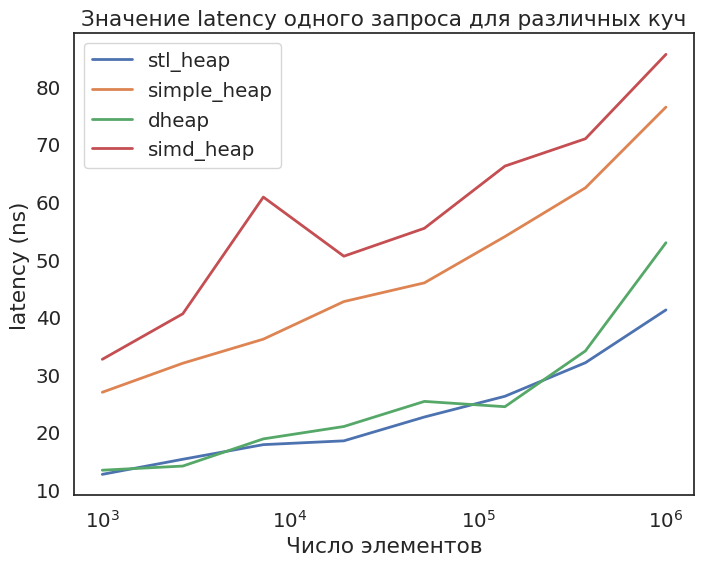

In [165]:
plot_latency(['stl_heap', 'simple_heap', 'dheap', 'simd_heap'])